In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [71]:
data = pd.read_csv('Placement_Data_Full_Class.csv')

In [72]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [73]:
data.shape

(215, 15)

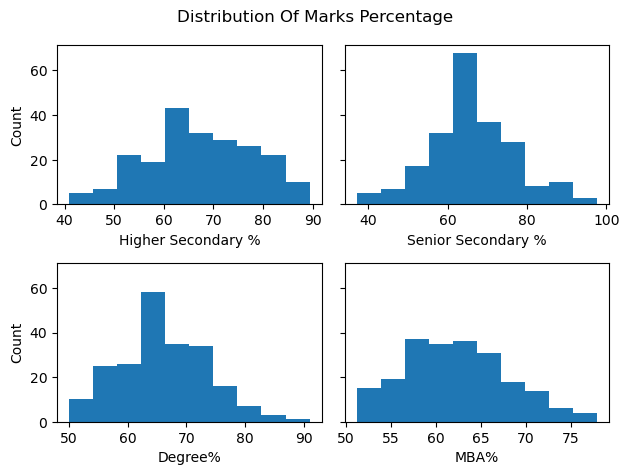

In [74]:
fig, ax = plt.subplots(2, 2, sharey=True)
ax[0, 0].hist(data.ssc_p, bins=10)
ax[0, 1].hist(data.hsc_p, bins=10)
ax[1, 0].hist(data.degree_p, bins=10)
ax[1, 1].hist(data.mba_p, bins=10)

ax[0, 0].set_ylabel("Count")
ax[1, 0].set_ylabel("Count")
ax[0, 0].set_xlabel("Higher Secondary %")
ax[0, 1].set_xlabel("Senior Secondary %")
ax[1, 0].set_xlabel("Degree%")
ax[1, 1].set_xlabel("MBA%")
fig.suptitle("Distribution Of Marks Percentage")
plt.tight_layout()
plt.show()

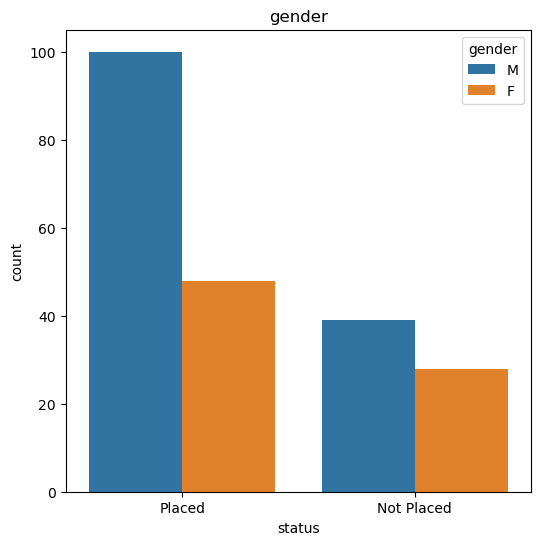

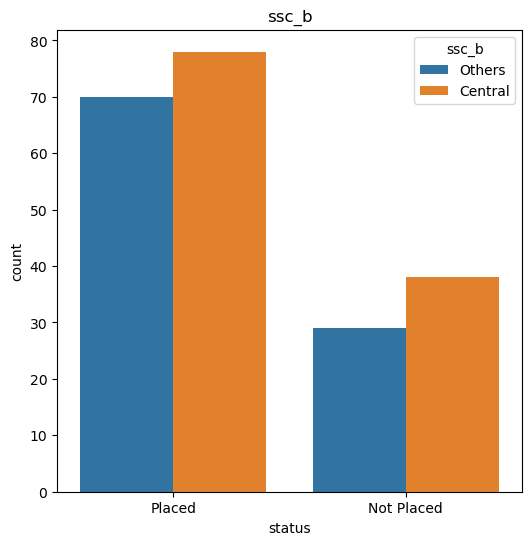

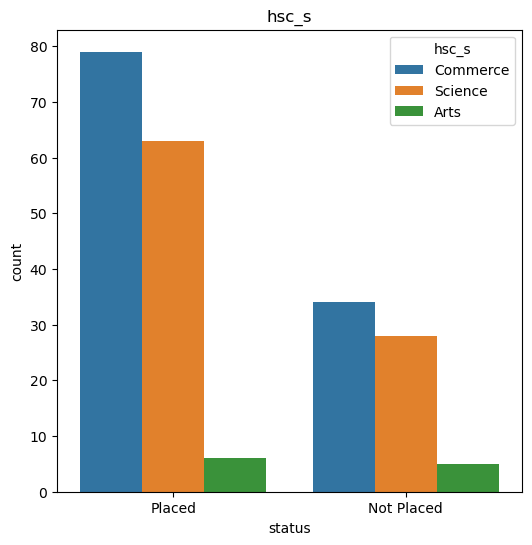

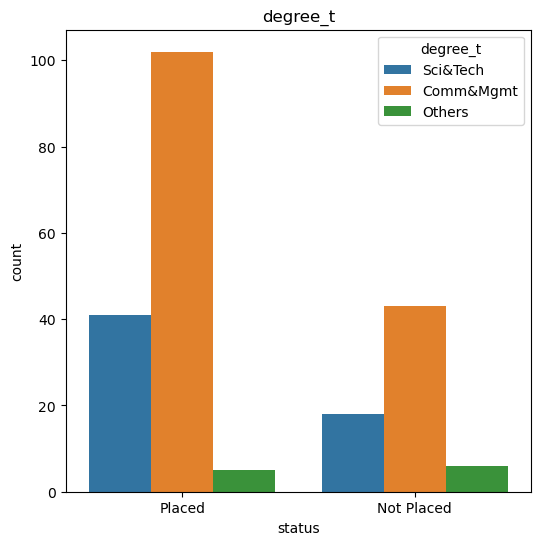

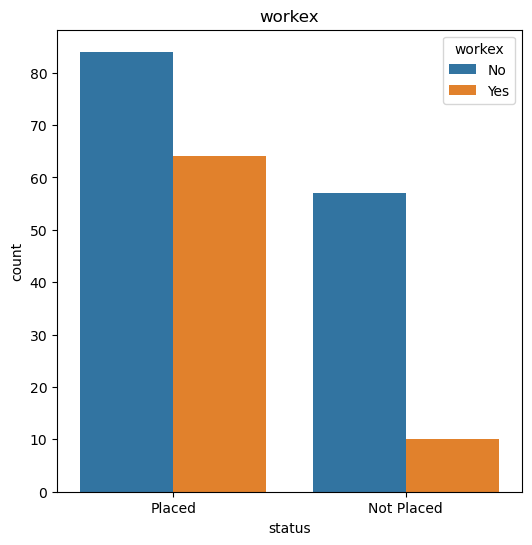

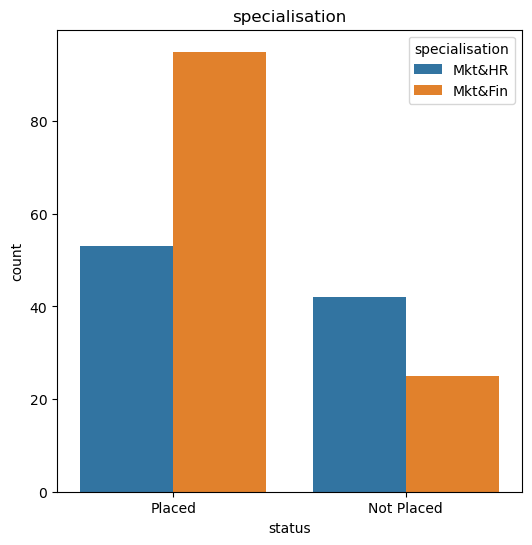

In [75]:
col_list = ["gender", "ssc_b", "hsc_s", "degree_t", "workex", "specialisation"]
for g in col_list:
    plt.figure(figsize=(6, 6))
    sns.countplot(
        data=data,
        x="status",
        hue=g,
    )
    plt.title(f"{g}")
    plt.show()

In [76]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [77]:
data.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [78]:
print(data['gender'].unique())
print(data['ssc_b'].unique())
print(data['hsc_b'].unique())
print(data['hsc_s'].unique())
print(data['degree_t'].unique())
print(data['specialisation'].unique())

['M' 'F']
['Others' 'Central']
['Others' 'Central']
['Commerce' 'Science' 'Arts']
['Sci&Tech' 'Comm&Mgmt' 'Others']
['Mkt&HR' 'Mkt&Fin']


In [79]:
data.replace({'M':1,'F':0, 'Central':1,'Mkt&HR':0,'Mkt&Fin':1,'Yes':1,"No":0,'Placed':1,'Not Placed':0}, inplace= True)
data['ssc_b'].replace({'Others':0},inplace= True)
data['hsc_b'].replace({'Others':0}, inplace= True)
data['salary'].fillna(0, inplace = True)
data['salary'] = data['salary'].astype('int64')
data = pd.get_dummies(data = data, columns = ['hsc_s', 'degree_t'])

In [80]:
data.drop(['sl_no', 'hsc_s_Commerce', 'degree_t_Comm&Mgmt'], inplace = True, axis = 'columns')

In [81]:
# data['salary'].fillna(data['salary'].mean(),inplace = True)
# data['salary'] = data['salary'].astype('int64')

In [82]:
data.isnull().sum()

gender               0
ssc_p                0
ssc_b                0
hsc_p                0
hsc_b                0
degree_p             0
workex               0
etest_p              0
specialisation       0
mba_p                0
status               0
salary               0
hsc_s_Arts           0
hsc_s_Science        0
degree_t_Others      0
degree_t_Sci&Tech    0
dtype: int64

<Axes: >

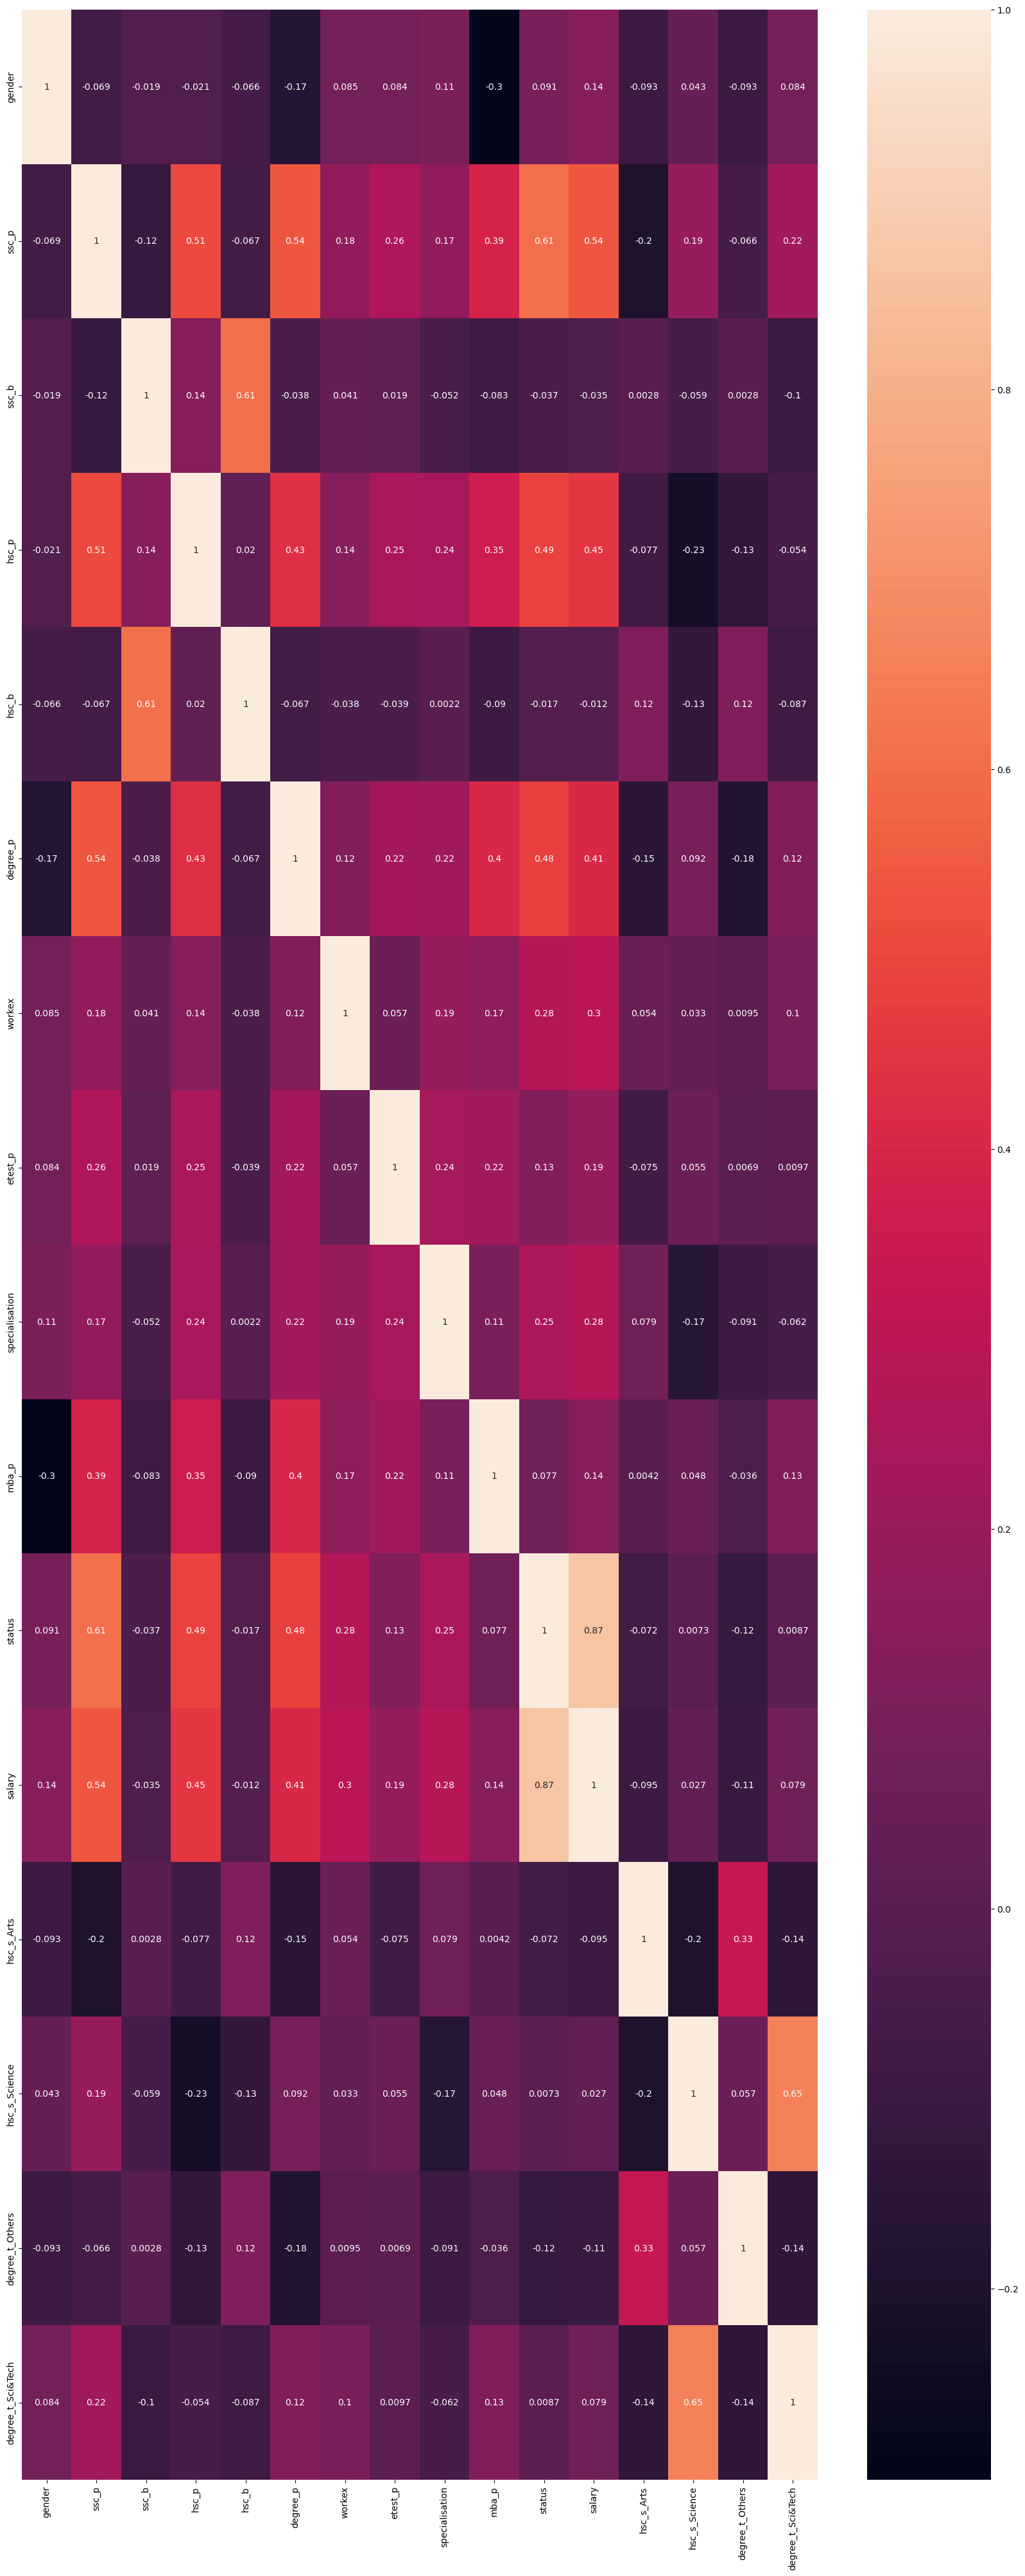

In [83]:
plt.figure(figsize = (20, 50))
sns.heatmap(data.corr() , annot= True )

In [84]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,hsc_s_Arts,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech
0,1,67.00,0,91.00,0,58.00,0,55.0,0,58.80,1,270000,0,0,0,1
1,1,79.33,1,78.33,0,77.48,1,86.5,1,66.28,1,200000,0,1,0,1
2,1,65.00,1,68.00,1,64.00,0,75.0,1,57.80,1,250000,1,0,0,0
3,1,56.00,1,52.00,1,52.00,0,66.0,0,59.43,0,0,0,1,0,1
4,1,85.80,1,73.60,1,73.30,0,96.8,1,55.50,1,425000,0,0,0,0


In [85]:
dummy_data = data.copy()
Y = dummy_data['status']
Y1 = dummy_data['salary']
X = dummy_data.drop(['salary', 'status'],axis = 'columns')

In [86]:
X.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Arts,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech
0,1,67.00,0,91.00,0,58.00,0,55.0,0,58.80,0,0,0,1
1,1,79.33,1,78.33,0,77.48,1,86.5,1,66.28,0,1,0,1
2,1,65.00,1,68.00,1,64.00,0,75.0,1,57.80,1,0,0,0
3,1,56.00,1,52.00,1,52.00,0,66.0,0,59.43,0,1,0,1
4,1,85.80,1,73.60,1,73.30,0,96.8,1,55.50,0,0,0,0


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score,precision_score ,recall_score, classification_report, r2_score, mean_squared_error, f1_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [88]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']] = scaler.fit_transform(X[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']])

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)

In [90]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y1, test_size = 0.2)

In [91]:
model=LogisticRegression()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

c:\Users\Hatem Abdul Hakeem\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [92]:
print("Accuracy Score = ", accuracy_score(Y_test, Y_pred))
print("Precision Score = ", precision_score(Y_test, Y_pred))
print("Recall Score = ", recall_score(Y_test, Y_pred))
print("F1 Score = ", f1_score(Y_test, Y_pred))

Accuracy Score =  0.8837209302325582
Precision Score =  0.9032258064516129
Recall Score =  0.9333333333333333
F1 Score =  0.9180327868852459


In [93]:
model1=LinearRegression()
model1.fit(X1_train,Y1_train)
Y1_pred=model1.predict(X1_test)

In [94]:
print('MSE = ', mean_squared_error(Y1_test, Y1_pred))
print('R2 = ', r2_score(Y1_test, Y1_pred))
print('Y1_pred=',Y1_pred)
# print('Y_pred=',Y_pred)

MSE =  31563130537.79521
R2 =  0.20919295279876915
Y1_pred= [ 91254.27113146  85311.4102132  155717.83922404 182513.17567882
 -14082.94192053 187361.70427224 148055.51692745 168436.56601959
 214798.9009309  186720.06126471 192027.78140763 186060.59017424
  78820.04865239 175592.54568733  28082.54507566 -23678.8206012
  79932.3246031  185471.70598672  58107.49796075 135669.87286617
 206218.9486195   31296.20897234  57041.58258546 261619.63830184
 295489.17648844 196193.5749355   65371.92859412 134555.2646686
 307456.97589088 185320.87738914 210691.73724003 151641.07788222
 -17986.5363535  334619.15598456 157561.63028241 186036.78043654
 112782.37956316 302725.74128924 111541.93148279 106097.51322392
  60256.58092996 265714.7155342  256459.86108484]


In [95]:
import pickle

# After training your model
# model = 'Placement_Data_Full_Class.csv' # Your trained model object
with open("model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

In [96]:
dec= DecisionTreeRegressor(criterion='squared_error', max_depth=3, random_state=0)
dec.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [97]:
print('Training set score: {:.4f}'.format(dec.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(dec.score(X_test, Y_test)))

Training set score: 0.5765
Test set score: 0.2255


In [98]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X1_train,Y1_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(Y_pred , Y1_test)
print("Accuracy:", accuracy)


Accuracy: 0.11627906976744186


In [99]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gradient_boost_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boost_classifier.fit(X_train,Y_train)

y_pred = gradient_boost_classifier.predict(X_test)

accuracy = accuracy_score(y_pred , Y_test)
print("Accuracy:", accuracy)


Accuracy: 0.8837209302325582


In [100]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,hsc_s_Arts,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech
0,1,67.00,0,91.00,0,58.00,0,55.0,0,58.80,1,270000,0,0,0,1
1,1,79.33,1,78.33,0,77.48,1,86.5,1,66.28,1,200000,0,1,0,1
2,1,65.00,1,68.00,1,64.00,0,75.0,1,57.80,1,250000,1,0,0,0
3,1,56.00,1,52.00,1,52.00,0,66.0,0,59.43,0,0,0,1,0,1
4,1,85.80,1,73.60,1,73.30,0,96.8,1,55.50,1,425000,0,0,0,0


In [101]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score

cart_classifier = DecisionTreeClassifier(random_state=42)
cart_classifier.fit(X_train,Y_train)

y_pred = cart_classifier.predict(X_test)

accuracy = accuracy_score(y_pred , Y_test)
print("Accuracy:", accuracy)
feature_names=['gender','ssc_p','ssc_b','hsc_p','hsc_b','hsc_s_Arts','hsc_s_Science','degree_p','degree_t_Others','workex','etest_p','specialisation','mba_p','degree_t_Sci&Tech']
tree_rules = export_text(cart_classifier, feature_names=feature_names)
print("Decision Tree Rules:\n", tree_rules)

Accuracy: 0.8372093023255814
Decision Tree Rules:
 |--- ssc_p <= 57.14
|   |--- hsc_s_Arts <= 70.65
|   |   |--- ssc_p <= 55.64
|   |   |   |--- degree_p <= 82.00
|   |   |   |   |--- class: 0
|   |   |   |--- degree_p >  82.00
|   |   |   |   |--- degree_t_Sci&Tech <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- degree_t_Sci&Tech >  0.50
|   |   |   |   |   |--- hsc_p <= 61.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- hsc_p >  61.00
|   |   |   |   |   |   |--- class: 0
|   |   |--- ssc_p >  55.64
|   |   |   |--- ssc_p <= 55.84
|   |   |   |   |--- class: 1
|   |   |   |--- ssc_p >  55.84
|   |   |   |   |--- class: 0
|   |--- hsc_s_Arts >  70.65
|   |   |--- class: 1
|--- ssc_p >  57.14
|   |--- hsc_p <= 54.50
|   |   |--- workex <= 65.86
|   |   |   |--- class: 0
|   |   |--- workex >  65.86
|   |   |   |--- class: 1
|   |--- hsc_p >  54.50
|   |   |--- ssc_p <= 70.94
|   |   |   |--- workex <= 59.49
|   |   |   |   |--- workex <= 52.30
|   |   |

In [102]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

svm_classifier = SVC()

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
